<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        pass
        return

##### 【Problem 1 】 Function seeking impurity

In [2]:
import numpy as np

def gini_impurity(class_counts):
  """
  Calculates the Gini impurity of a node.

  Args:
    class_counts (list or numpy.ndarray): A list or array containing the
      number of samples for each class in the node.

  Returns:
    float: The Gini impurity of the node.
  """
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

# Example 1: Class 1: 15, Class 2: 15
class_counts1 = np.array([15, 15])
gini1 = gini_impurity(class_counts1)
print(f"Class 1: 15, Class 2: 15 -> Gini Impurity (Function): {gini1:.3f}")
print(f"Class 1: 15, Class 2: 15 -> Gini Impurity (Hand Calculation): 1 - ((15/30)^2 + (15/30)^2) = 1 - (0.5^2 + 0.5^2) = 1 - (0.25 + 0.25) = 1 - 0.50 = 0.500")
print("-" * 50)

# Example 2: Class 1: 15, Class 2: 15, Class 3: 15
class_counts2 = np.array([15, 15, 15])
gini2 = gini_impurity(class_counts2)
print(f"Class 1: 15, Class 2: 15, Class 3: 15 -> Gini Impurity (Function): {gini2:.3f}")
print(f"Class 1: 15, Class 2: 15, Class 3: 15 -> Gini Impurity (Hand Calculation): 1 - ((15/45)^2 + (15/45)^2 + (15/45)^2) = 1 - ((1/3)^2 + (1/3)^2 + (1/3)^2) = 1 - (1/9 + 1/9 + 1/9) = 1 - 3/9 = 1 - 1/3 = 0.667")
print("-" * 50)

# Example 3: Class 1: 18, Class 2: 12
class_counts3 = np.array([18, 12])
gini3 = gini_impurity(class_counts3)
print(f"Class 1: 18, Class 2: 12 -> Gini Impurity (Function): {gini3:.3f}")
print(f"Class 1: 18, Class 2: 12 -> Gini Impurity (Hand Calculation): 1 - ((18/30)^2 + (12/30)^2) = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 1 - 0.52 = 0.480")
print("-" * 50)

# Example 4: Class 1: 30, Class 2: 0
class_counts4 = np.array([30, 0])
gini4 = gini_impurity(class_counts4)
print(f"Class 1: 30, Class 2: 0 -> Gini Impurity (Function): {gini4:.3f}")
print(f"Class 1: 30, Class 2: 0 -> Gini Impurity (Hand Calculation): 1 - ((30/30)^2 + (0/30)^2) = 1 - (1^2 + 0^2) = 1 - (1 + 0) = 1 - 1 = 0.000")

Class 1: 15, Class 2: 15 -> Gini Impurity (Function): 0.500
Class 1: 15, Class 2: 15 -> Gini Impurity (Hand Calculation): 1 - ((15/30)^2 + (15/30)^2) = 1 - (0.5^2 + 0.5^2) = 1 - (0.25 + 0.25) = 1 - 0.50 = 0.500
--------------------------------------------------
Class 1: 15, Class 2: 15, Class 3: 15 -> Gini Impurity (Function): 0.667
Class 1: 15, Class 2: 15, Class 3: 15 -> Gini Impurity (Hand Calculation): 1 - ((15/45)^2 + (15/45)^2 + (15/45)^2) = 1 - ((1/3)^2 + (1/3)^2 + (1/3)^2) = 1 - (1/9 + 1/9 + 1/9) = 1 - 3/9 = 1 - 1/3 = 0.667
--------------------------------------------------
Class 1: 18, Class 2: 12 -> Gini Impurity (Function): 0.480
Class 1: 18, Class 2: 12 -> Gini Impurity (Hand Calculation): 1 - ((18/30)^2 + (12/30)^2) = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 1 - 0.52 = 0.480
--------------------------------------------------
Class 1: 30, Class 2: 0 -> Gini Impurity (Function): 0.000
Class 1: 30, Class 2: 0 -> Gini Impurity (Hand Calculation): 1 - ((30/30)^2 + (0/30)^2) = 

##### 【Problem 2 】 Function seeking information gain

In [3]:
import numpy as np

def gini_impurity(class_counts):
  """
  Calculates the Gini impurity of a node.

  Args:
    class_counts (list or numpy.ndarray): A list or array containing the
      number of samples for each class in the node.

  Returns:
    float: The Gini impurity of the node.
  """
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

def information_gain(parent_counts, left_counts, right_counts):
  """
  Calculates the information gain between a parent node and its two child nodes
  (left and right).

  Args:
    parent_counts (list or numpy.ndarray): Class counts of the parent node.
    left_counts (list or numpy.ndarray): Class counts of the left child node.
    right_counts (list or numpy.ndarray): Class counts of the right child node.

  Returns:
    float: The information gain.
  """
  parent_impurity = gini_impurity(parent_counts)
  left_impurity = gini_impurity(left_counts)
  right_impurity = gini_impurity(right_counts)

  parent_total = np.sum(parent_counts)
  left_total = np.sum(left_counts)
  right_total = np.sum(right_counts)

  if parent_total == 0:
    return 0.0

  weighted_impurity = (left_total / parent_total) * left_impurity + \
                      (right_total / parent_total) * right_impurity

  information_gain_value = parent_impurity - weighted_impurity
  return information_gain_value

# Example:
left_node_counts = np.array([10, 30])
right_node_counts = np.array([20, 5])
parent_node_counts = left_node_counts + right_node_counts

information_gain_value = information_gain(parent_node_counts, left_node_counts, right_node_counts)
print(f"Left Node Class 1: 10, Left Node Class 2: 30")
print(f"Right Node Class 1: 20, Right Node Class 2: 5")
print(f"Information Gain (Function): {information_gain_value:.3f}")

# Hand Calculation:
parent_impurity_hand = gini_impurity(parent_node_counts)
left_impurity_hand = gini_impurity(left_node_counts)
right_impurity_hand = gini_impurity(right_node_counts)

parent_total_hand = np.sum(parent_node_counts)
left_total_hand = np.sum(left_node_counts)
right_total_hand = np.sum(right_node_counts)

weighted_impurity_hand = (left_total_hand / parent_total_hand) * left_impurity_hand + \
                         (right_total_hand / parent_total_hand) * right_impurity_hand

information_gain_hand = parent_impurity_hand - weighted_impurity_hand
print(f"Information Gain (Hand Calculation): {information_gain_hand:.3f}")

Left Node Class 1: 10, Left Node Class 2: 30
Right Node Class 1: 20, Right Node Class 2: 5
Information Gain (Function): 0.143
Information Gain (Hand Calculation): 0.143


##### 【Problem 3 】 Learning


Decision Tree (Depth 1):
Root: Split on feature 'Feature1' <= 1.000
  Left Node (<= 1.000): Class distribution = {'A': np.int64(3), 'B': np.int64(1)}, Predicted Class = A
  Right Node (> 1.000): Class distribution = {'A': np.int64(1), 'B': np.int64(3)}, Predicted Class = B


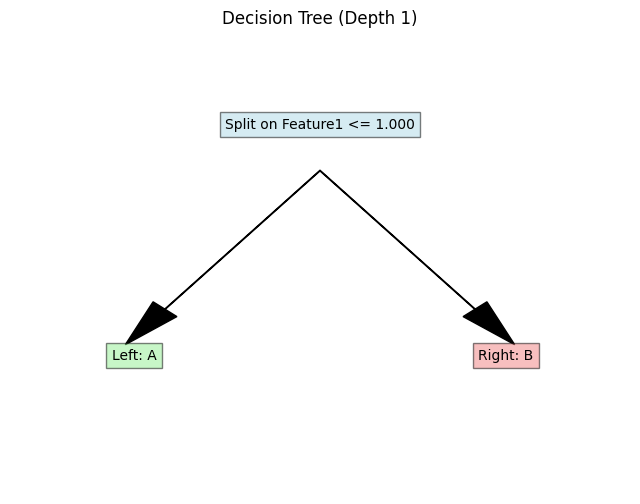


Decision Tree (Depth 1):
Root: Split on feature 'Sepal.Length' <= 5.100
  Left Node (<= 5.100): Class distribution = {'setosa': np.int64(5)}, Predicted Class = setosa
  Right Node (> 5.100): Class distribution = {'versicolor': np.int64(5)}, Predicted Class = versicolor


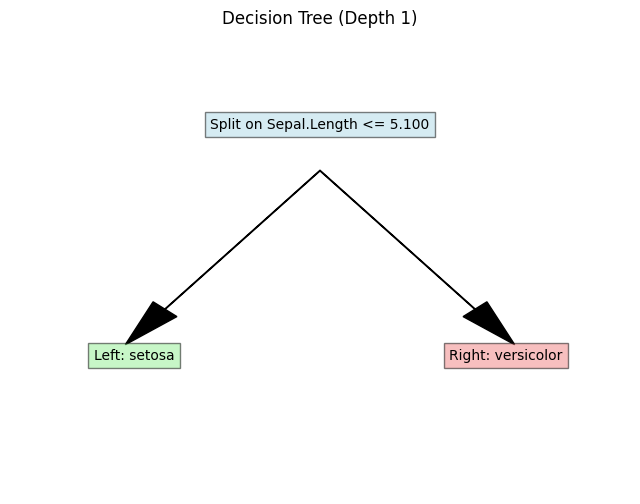

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

def gini_impurity(class_counts):
  """Calculates the Gini impurity of a node."""
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

def information_gain(parent_counts, left_counts, right_counts):
  """Calculates the information gain between a parent and its children."""
  parent_impurity = gini_impurity(parent_counts)
  left_impurity = gini_impurity(left_counts)
  right_impurity = gini_impurity(right_counts)

  parent_total = np.sum(parent_counts)
  left_total = np.sum(left_counts)
  right_total = np.sum(right_counts)

  if parent_total == 0:
    return 0.0

  weighted_impurity = (left_total / parent_total) * left_impurity + \
                      (right_total / parent_total) * right_impurity

  information_gain_value = parent_impurity - weighted_impurity
  return information_gain_value

def create_split(data, feature_index, threshold):
  """Splits the data based on a feature and a threshold."""
  left_data = data[data[:, feature_index] <= threshold]
  right_data = data[data[:, feature_index] > threshold]
  return left_data, right_data

def calculate_class_counts(data, target_index):
  """Calculates the counts of each class in a dataset."""
  classes, counts = np.unique(data[:, target_index], return_counts=True)
  class_counts = {cls: count for cls, count in zip(classes, counts)}
  return class_counts

def find_best_split(data, target_index):
  """Finds the best split based on maximum information gain."""
  best_gain = 0
  best_split_feature = None
  best_split_threshold = None
  parent_counts = np.array(list(calculate_class_counts(data, target_index).values()))

  n_samples, n_features = data.shape[0], data.shape[1] - 1

  for feature_index in range(n_features):
    unique_values = np.unique(data[:, feature_index])
    # Consider thresholds as the unique values of the feature
    for threshold in unique_values:
      left_data, right_data = create_split(data, feature_index, threshold)

      if len(left_data) > 0 and len(right_data) > 0:
        left_counts = np.array(list(calculate_class_counts(left_data, target_index).values()))
        right_counts = np.array(list(calculate_class_counts(right_data, target_index).values()))
        gain = information_gain(parent_counts, left_counts, right_counts)

        if gain > best_gain:
          best_gain = gain
          best_split_feature = feature_index
          best_split_threshold = threshold

  return best_split_feature, best_split_threshold, best_gain

def create_decision_tree_depth_1(data, feature_names, target_name):
  """Creates a decision tree with a depth of 1."""
  target_index = np.where(np.array(data.columns) == target_name)[0][0]
  data_array = data.values

  best_feature_index, best_threshold, best_gain = find_best_split(data_array, target_index)

  if best_feature_index is not None:
    left_data, right_data = create_split(data_array, best_feature_index, best_threshold)

    left_class_counts = calculate_class_counts(left_data, target_index)
    right_class_counts = calculate_class_counts(right_data, target_index)

    def get_leaf_label(counts):
      if not counts:
        return "Undefined"
      classes = list(counts.keys())
      if len(classes) == 1:
        return classes[0]
      else:
        # Majority vote
        return max(counts, key=counts.get)

    left_label = get_leaf_label(left_class_counts)
    right_label = get_leaf_label(right_class_counts)

    print("\nDecision Tree (Depth 1):")
    print(f"Root: Split on feature '{feature_names[best_feature_index]}' <= {best_threshold:.3f}")
    print(f"  Left Node (<= {best_threshold:.3f}): Class distribution = {left_class_counts}, Predicted Class = {left_label}")
    print(f"  Right Node (> {best_threshold:.3f}): Class distribution = {right_class_counts}, Predicted Class = {right_label}")

    # Visualization (Conceptual for depth 1)
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.8, f"Split on {feature_names[best_feature_index]} <= {best_threshold:.3f}", ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(0.2, 0.3, f"Left: {left_label}", ha='center', va='center', bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.text(0.8, 0.3, f"Right: {right_label}", ha='center', va='center', bbox=dict(facecolor='lightcoral', alpha=0.5))
    plt.arrow(0.5, 0.7, -0.25, -0.3, head_width=0.05, head_length=0.1, fc='black', ec='black')
    plt.arrow(0.5, 0.7, 0.25, -0.3, head_width=0.05, head_length=0.1, fc='black', ec='black')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("Decision Tree (Depth 1)")
    plt.axis('off')
    plt.show()

  else:
    parent_class_counts = calculate_class_counts(data_array, target_index)
    parent_label = max(parent_class_counts, key=parent_class_counts.get) if parent_class_counts else "Undefined"
    print("\nDecision Tree (Depth 1): No split performed (e.g., pure node or no gain).")
    print(f"Root Node: Class distribution = {parent_class_counts}, Predicted Class = {parent_label}")
    plt.figure(figsize=(4, 3))
    plt.text(0.5, 0.5, f"Root: {parent_label}", ha='center', va='center', bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("Decision Tree (Depth 0 - No Split)")
    plt.axis('off')
    plt.show()

# Example Usage:
# Sample training data (replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 1, 2, 2, 1, 2, 1, 2],
    'Feature2': [1, 2, 1, 2, 2, 1, 1, 2],
    'Class': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A']
})

feature_names = ['Feature1', 'Feature2']
target_name = 'Class'

create_decision_tree_depth_1(data.copy(), feature_names, target_name)

# Another Example
data_iris = pd.DataFrame({
    'Sepal.Length': [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5],
    'Sepal.Width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.2, 3.2, 3.1, 2.3, 2.8],
    'Petal.Length': [1.4, 1.4, 1.3, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6],
    'Petal.Width': [0.2, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5],
    'Species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
})

feature_names_iris = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
target_name_iris = 'Species'

create_decision_tree_depth_1(data_iris.copy(), feature_names_iris, target_name_iris)

##### 【Problem 4 】 Estimated

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

def gini_impurity(class_counts):
  """Calculates the Gini impurity of a node."""
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

def information_gain(parent_counts, left_counts, right_counts):
  """Calculates the information gain between a parent and its children."""
  parent_impurity = gini_impurity(parent_counts)
  left_impurity = gini_impurity(left_counts)
  right_impurity = gini_impurity(right_counts)

  parent_total = np.sum(parent_counts)
  left_total = np.sum(left_counts)
  right_total = np.sum(right_counts)

  if parent_total == 0:
    return 0.0

  weighted_impurity = (left_total / parent_total) * left_impurity + \
                      (right_total / parent_total) * right_impurity

  information_gain_value = parent_impurity - weighted_impurity
  return information_gain_value

def create_split(data, feature_index, threshold):
  """Splits the data based on a feature and a threshold."""
  left_data = data[data[:, feature_index] <= threshold]
  right_data = data[data[:, feature_index] > threshold]
  return left_data, right_data

def calculate_class_counts(data, target_index):
  """Calculates the counts of each class in a dataset."""
  classes, counts = np.unique(data[:, target_index], return_counts=True)
  class_counts = {cls: count for cls, count in zip(classes, counts)}
  return class_counts

def get_leaf_label(counts):
  """Determines the label of a leaf node based on class counts."""
  if not counts:
    return None
  classes = list(counts.keys())
  if len(classes) == 1:
    return classes[0]
  else:
    # Majority vote
    return max(counts, key=counts.get)

class ScratchDecisionTreeClassifierDepth1:
  """A decision tree classifier with a maximum depth of 1."""
  def __init__(self):
    self.root = {}
    self.feature_names = None
    self.target_name = None
    self.target_index = None

  def fit(self, X, y):
    """Fits the decision tree to the training data."""
    data = pd.concat([pd.DataFrame(X, columns=self.feature_names), pd.Series(y, name=self.target_name)], axis=1)
    data_array = data.values
    self.target_index = np.where(np.array(data.columns) == self.target_name)[0][0]

    best_gain = 0
    best_split_feature_index = None
    best_split_threshold = None
    parent_counts = np.array(list(calculate_class_counts(data_array, self.target_index).values()))

    n_samples, n_features = X.shape[0], X.shape[1]

    for feature_index in range(n_features):
      unique_values = np.unique(X[:, feature_index])
      for threshold in unique_values:
        left_data, right_data = create_split(data_array, feature_index, threshold)

        if len(left_data) > 0 and len(right_data) > 0:
          left_counts = np.array(list(calculate_class_counts(left_data, self.target_index).values()))
          right_counts = np.array(list(calculate_class_counts(right_data, self.target_index).values()))
          gain = information_gain(parent_counts, left_counts, right_counts)

          if gain > best_gain:
            best_gain = gain
            best_split_feature_index = feature_index
            best_split_threshold = threshold

    if best_split_feature_index is not None:
      left_data, right_data = create_split(data_array, best_split_feature_index, best_split_threshold)
      left_class_counts = calculate_class_counts(left_data, self.target_index)
      right_class_counts = calculate_class_counts(right_data, self.target_index)
      left_label = get_leaf_label(left_class_counts)
      right_label = get_leaf_label(right_class_counts)

      self.root = {
          'feature_index': best_split_feature_index,
          'threshold': best_split_threshold,
          'left_label': left_label,
          'right_label': right_label
      }
      print("\nDecision Tree (Depth 1) trained.")
      print(f"Root: Split on feature '{self.feature_names[best_split_feature_index]}' <= {best_split_threshold:.3f}")
      print(f"  Left Leaf (<= {best_split_threshold:.3f}): Predicted Class = {left_label}")
      print(f"  Right Leaf (> {best_split_threshold:.3f}): Predicted Class = {right_label}")
    else:
      parent_class_counts = calculate_class_counts(data_array, self.target_index)
      parent_label = get_leaf_label(parent_class_counts)
      self.root = {'leaf_label': parent_label}
      print("\nDecision Tree (Depth 1) trained - No split performed (root is leaf).")
      print(f"Root (Leaf): Predicted Class = {parent_label}")

  def predict(self, X):
    """Predicts the class labels for the given data."""
    predictions = []
    for sample in X:
      if 'leaf_label' in self.root:
        predictions.append(self.root['leaf_label'])
      else:
        feature_value = sample[self.root['feature_index']]
        threshold = self.root['threshold']
        if feature_value <= threshold:
          predictions.append(self.root['left_label'])
        else:
          predictions.append(self.root['right_label'])
    return np.array(predictions)

# Example Usage:
# Sample training data
X_train = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2],
    [1, 2],
    [2, 1],
    [1, 1],
    [2, 2]
])
y_train = np.array(['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A'])
feature_names = ['Feature1', 'Feature2']
target_name = 'Class'

# Create and train the classifier
model = ScratchDecisionTreeClassifierDepth1()
model.feature_names = feature_names
model.target_name = target_name
model.fit(X_train, y_train)

# Example test data
X_test = np.array([
    [1.5, 1.5],
    [0.5, 2.1],
    [2.2, 0.8],
    [1.1, 1.8]
])

# Predict the classes for the test data
predictions = model.predict(X_test)
print("\nPredictions for X_test:", predictions)

# Another Example with Iris Data
data_iris = pd.DataFrame({
    'Sepal.Length': [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5],
    'Sepal.Width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.2, 3.2, 3.1, 2.3, 2.8],
    'Petal.Length': [1.4, 1.4, 1.3, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6],
    'Petal.Width': [0.2, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5],
    'Species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
})

X_train_iris = data_iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
y_train_iris = data_iris['Species'].values
feature_names_iris = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
target_name_iris = 'Species'

model_iris = ScratchDecisionTreeClassifierDepth1()
model_iris.feature_names = feature_names_iris
model_iris.target_name = target_name_iris
model_iris.fit(X_train_iris, y_train_iris)

X_test_iris = np.array([
    [5.0, 3.4, 1.5, 0.2],
    [6.1, 2.8, 4.7, 1.2]
])
predictions_iris = model_iris.predict(X_test_iris)
print("\nPredictions for X_test_iris:", predictions_iris)


Decision Tree (Depth 1) trained.
Root: Split on feature 'Feature1' <= 1.000
  Left Leaf (<= 1.000): Predicted Class = A
  Right Leaf (> 1.000): Predicted Class = B

Predictions for X_test: ['B' 'A' 'B' 'B']

Decision Tree (Depth 1) trained.
Root: Split on feature 'Sepal.Length' <= 5.100
  Left Leaf (<= 5.100): Predicted Class = setosa
  Right Leaf (> 5.100): Predicted Class = versicolor

Predictions for X_test_iris: ['setosa' 'versicolor']


##### 【Problem 5 】 Learning and estimation


Scratch Decision Tree (Depth 1) trained.
Root: Split on feature 'Feature1' <= 0.592
  Left Leaf (<= 0.592): Predicted Class = 0.0
  Right Leaf (> 0.592): Predicted Class = 1.0

--- Scratch Decision Tree Evaluation ---
Accuracy: 0.7666666666666667
Precision: 0.8333333333333334
Recall: 0.6666666666666666

--- scikit-learn Decision Tree (Depth 1) Evaluation ---
Accuracy: 0.7666666666666667
Precision: 0.8333333333333334
Recall: 0.6666666666666666


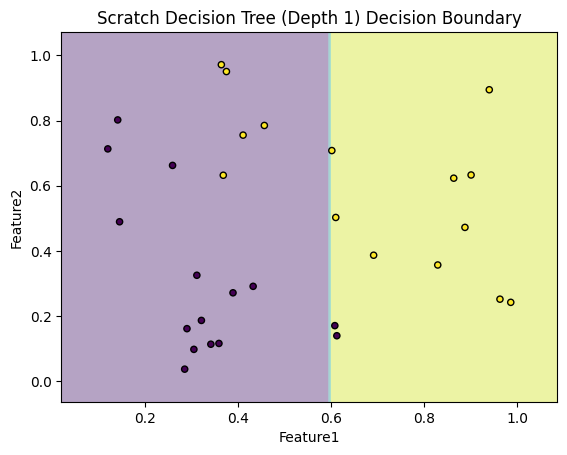

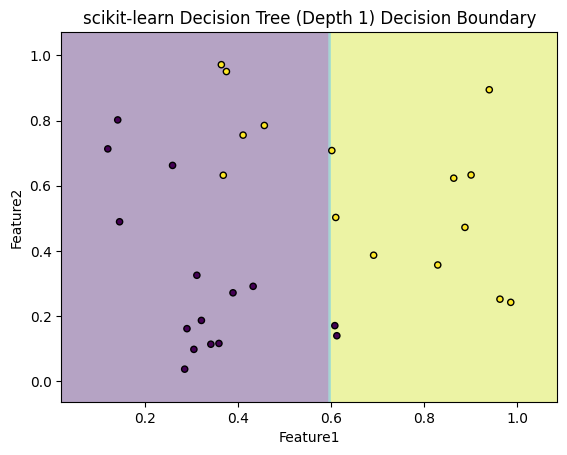

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Re-define the ScratchDecisionTreeClassifierDepth1 for this problem
def gini_impurity(class_counts):
  """Calculates the Gini impurity of a node."""
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

def information_gain(parent_counts, left_counts, right_counts):
  """Calculates the information gain between a parent and its children."""
  parent_impurity = gini_impurity(parent_counts)
  left_impurity = gini_impurity(left_counts)
  right_impurity = gini_impurity(right_counts)

  parent_total = np.sum(parent_counts)
  left_total = np.sum(left_counts)
  right_total = np.sum(right_counts)

  if parent_total == 0:
    return 0.0

  weighted_impurity = (left_total / parent_total) * left_impurity + \
                      (right_total / parent_total) * right_impurity

  information_gain_value = parent_impurity - weighted_impurity
  return information_gain_value

def create_split(data, feature_index, threshold):
  """Splits the data based on a feature and a threshold."""
  left_data = data[data[:, feature_index] <= threshold]
  right_data = data[data[:, feature_index] > threshold]
  return left_data, right_data

def calculate_class_counts(data, target_index):
  """Calculates the counts of each class in a dataset."""
  classes, counts = np.unique(data[:, target_index], return_counts=True)
  class_counts = {cls: count for cls, count in zip(classes, counts)}
  return class_counts

def get_leaf_label(counts):
  """Determines the label of a leaf node based on class counts."""
  if not counts:
    return None
  classes = list(counts.keys())
  if len(classes) == 1:
    return classes[0]
  else:
    # Majority vote
    return max(counts, key=counts.get)

class ScratchDecisionTreeClassifierDepth1:
  """A decision tree classifier with a maximum depth of 1."""
  def __init__(self):
    self.root = {}
    self.feature_names = None
    self.target_name = None
    self.target_index = None

  def fit(self, X, y):
    """Fits the decision tree to the training data."""
    data = pd.concat([pd.DataFrame(X, columns=self.feature_names), pd.Series(y, name=self.target_name)], axis=1)
    data_array = data.values
    self.target_index = np.where(np.array(data.columns) == self.target_name)[0][0]

    best_gain = 0
    best_split_feature_index = None
    best_split_threshold = None
    parent_counts = np.array(list(calculate_class_counts(data_array, self.target_index).values()))

    n_samples, n_features = X.shape[0], X.shape[1]

    for feature_index in range(n_features):
      unique_values = np.unique(X[:, feature_index])
      for threshold in unique_values:
        left_data, right_data = create_split(data_array, feature_index, threshold)

        if len(left_data) > 0 and len(right_data) > 0:
          left_counts = np.array(list(calculate_class_counts(left_data, self.target_index).values()))
          right_counts = np.array(list(calculate_class_counts(right_data, self.target_index).values()))
          gain = information_gain(parent_counts, left_counts, right_counts)

          if gain > best_gain:
            best_gain = gain
            best_split_feature_index = feature_index
            best_split_threshold = threshold

    if best_split_feature_index is not None:
      left_data, right_data = create_split(data_array, best_split_feature_index, best_split_threshold)
      left_class_counts = calculate_class_counts(left_data, self.target_index)
      right_class_counts = calculate_class_counts(right_data, self.target_index)
      left_label = get_leaf_label(left_class_counts)
      right_label = get_leaf_label(right_class_counts)

      self.root = {
          'feature_index': best_split_feature_index,
          'threshold': best_split_threshold,
          'left_label': left_label,
          'right_label': right_label
      }
      print("\nScratch Decision Tree (Depth 1) trained.")
      print(f"Root: Split on feature '{self.feature_names[best_split_feature_index]}' <= {best_split_threshold:.3f}")
      print(f"  Left Leaf (<= {best_split_threshold:.3f}): Predicted Class = {left_label}")
      print(f"  Right Leaf (> {best_split_threshold:.3f}): Predicted Class = {right_label}")
    else:
      parent_class_counts = calculate_class_counts(data_array, self.target_index)
      parent_label = get_leaf_label(parent_class_counts)
      self.root = {'leaf_label': parent_label}
      print("\nScratch Decision Tree (Depth 1) trained - No split performed (root is leaf).")
      print(f"Root (Leaf): Predicted Class = {parent_label}")

  def predict(self, X):
    """Predicts the class labels for the given data."""
    predictions = []
    for sample in X:
      if 'leaf_label' in self.root:
        predictions.append(self.root['leaf_label'])
      else:
        feature_value = sample[self.root['feature_index']]
        threshold = self.root['threshold']
        if feature_value <= threshold:
          predictions.append(self.root['left_label'])
        else:
          predictions.append(self.root['right_label'])
    return np.array(predictions)

# Prepare Simple Dataset 2 (assuming it's available from the Sprint)
# For demonstration purposes, let's create a synthetic binary classification dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where((X[:, 0] + X[:, 1]) > 1, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature and target names
feature_names = ['Feature1', 'Feature2']
target_name = 'Target'

# Train and evaluate the Scratch Decision Tree
scratch_model = ScratchDecisionTreeClassifierDepth1()
scratch_model.feature_names = feature_names
scratch_model.target_name = target_name
scratch_model.fit(X_train, y_train)
scratch_predictions = scratch_model.predict(X_test)

print("\n--- Scratch Decision Tree Evaluation ---")
print("Accuracy:", accuracy_score(y_test, scratch_predictions))
print("Precision:", precision_score(y_test, scratch_predictions))
print("Recall:", recall_score(y_test, scratch_predictions))

# Train and evaluate the scikit-learn Decision Tree (depth 1)
sklearn_model = SklearnDecisionTreeClassifier(max_depth=1, criterion='gini')
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

print("\n--- scikit-learn Decision Tree (Depth 1) Evaluation ---")
print("Accuracy:", accuracy_score(y_test, sklearn_predictions))
print("Precision:", precision_score(y_test, sklearn_predictions))
print("Recall:", recall_score(y_test, sklearn_predictions))

# Visualizing the decision boundaries (for 2D data)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Plot decision boundaries
plot_decision_boundary(scratch_model, X_test, y_test, 'Scratch Decision Tree (Depth 1) Decision Boundary')
plot_decision_boundary(sklearn_model, X_test, y_test, 'scikit-learn Decision Tree (Depth 1) Decision Boundary')

##### 【Problem 6 】 Visualization of decision area


Scratch Decision Tree (Depth 1) trained.
Root: Split on feature 'Feature1' <= 0.592
  Left Leaf (<= 0.592): Predicted Class = 0.0
  Right Leaf (> 0.592): Predicted Class = 1.0


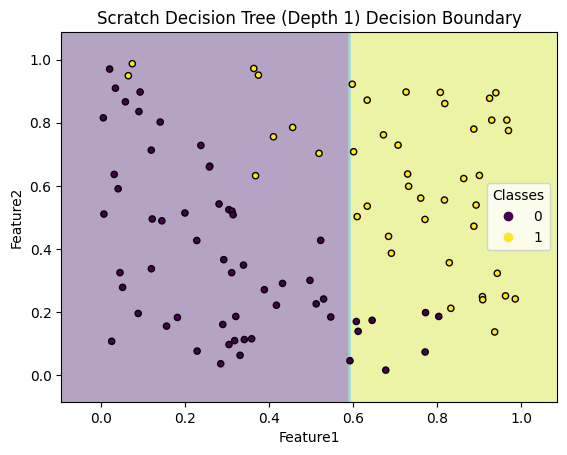

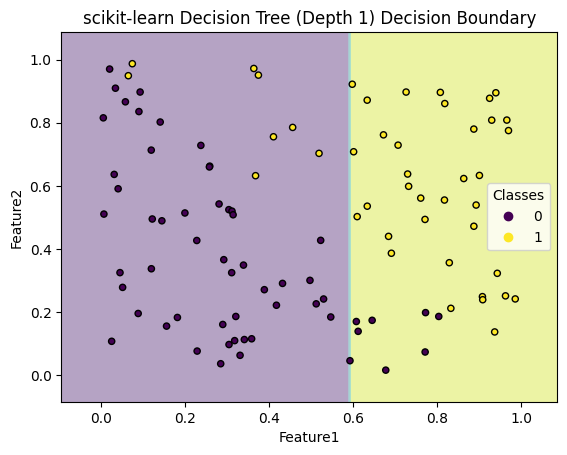

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier

# Re-define the ScratchDecisionTreeClassifierDepth1 (same as in Problem 5)
def gini_impurity(class_counts):
  total_samples = np.sum(class_counts)
  if total_samples == 0:
    return 0.0
  probabilities = class_counts / total_samples
  gini = 1 - np.sum(probabilities**2)
  return gini

def information_gain(parent_counts, left_counts, right_counts):
  parent_impurity = gini_impurity(parent_counts)
  left_impurity = gini_impurity(left_counts)
  right_impurity = gini_impurity(right_counts)

  parent_total = np.sum(parent_counts)
  left_total = np.sum(left_counts)
  right_total = np.sum(right_counts)

  if parent_total == 0:
    return 0.0

  weighted_impurity = (left_total / parent_total) * left_impurity + \
                      (right_total / parent_total) * right_impurity

  information_gain_value = parent_impurity - weighted_impurity
  return information_gain_value

def create_split(data, feature_index, threshold):
  left_data = data[data[:, feature_index] <= threshold]
  right_data = data[data[:, feature_index] > threshold]
  return left_data, right_data

def calculate_class_counts(data, target_index):
  classes, counts = np.unique(data[:, target_index], return_counts=True)
  class_counts = {cls: count for cls, count in zip(classes, counts)}
  return class_counts

def get_leaf_label(counts):
  if not counts:
    return None
  classes = list(counts.keys())
  if len(classes) == 1:
    return classes[0]
  else:
    return max(counts, key=counts.get)

class ScratchDecisionTreeClassifierDepth1:
  def __init__(self):
    self.root = {}
    self.feature_names = None
    self.target_name = None
    self.target_index = None

  def fit(self, X, y):
    data = pd.concat([pd.DataFrame(X, columns=self.feature_names), pd.Series(y, name=self.target_name)], axis=1)
    data_array = data.values
    self.target_index = np.where(np.array(data.columns) == self.target_name)[0][0]

    best_gain = 0
    best_split_feature_index = None
    best_split_threshold = None
    parent_counts = np.array(list(calculate_class_counts(data_array, self.target_index).values()))

    n_samples, n_features = X.shape[0], X.shape[1]

    for feature_index in range(n_features):
      unique_values = np.unique(X[:, feature_index])
      for threshold in unique_values:
        left_data, right_data = create_split(data_array, feature_index, threshold)

        if len(left_data) > 0 and len(right_data) > 0:
          left_counts = np.array(list(calculate_class_counts(left_data, self.target_index).values()))
          right_counts = np.array(list(calculate_class_counts(right_data, self.target_index).values()))
          gain = information_gain(parent_counts, left_counts, right_counts)

          if gain > best_gain:
            best_gain = gain
            best_split_feature_index = feature_index
            best_split_threshold = threshold

    if best_split_feature_index is not None:
      left_data, right_data = create_split(data_array, best_split_feature_index, best_split_threshold)
      left_class_counts = calculate_class_counts(left_data, self.target_index)
      right_class_counts = calculate_class_counts(right_data, self.target_index)
      left_label = get_leaf_label(left_class_counts)
      right_label = get_leaf_label(right_class_counts)

      self.root = {
          'feature_index': best_split_feature_index,
          'threshold': best_split_threshold,
          'left_label': left_label,
          'right_label': right_label
      }
      print("\nScratch Decision Tree (Depth 1) trained.")
      print(f"Root: Split on feature '{self.feature_names[best_split_feature_index]}' <= {best_split_threshold:.3f}")
      print(f"  Left Leaf (<= {best_split_threshold:.3f}): Predicted Class = {left_label}")
      print(f"  Right Leaf (> {best_split_threshold:.3f}): Predicted Class = {right_label}")
    else:
      parent_class_counts = calculate_class_counts(data_array, self.target_index)
      parent_label = get_leaf_label(parent_class_counts)
      self.root = {'leaf_label': parent_label}
      print("\nScratch Decision Tree (Depth 1) trained - No split performed (root is leaf).")
      print(f"Root (Leaf): Predicted Class = {parent_label}")

  def predict(self, X):
    predictions = []
    for sample in X:
      if 'leaf_label' in self.root:
        predictions.append(self.root['leaf_label'])
      else:
        feature_value = sample[self.root['feature_index']]
        threshold = self.root['threshold']
        if feature_value <= threshold:
          predictions.append(self.root['left_label'])
        else:
          predictions.append(self.root['right_label'])
    return np.array(predictions)

# Prepare Simple Dataset 2 (using the same synthetic data as Problem 5)
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where((X[:, 0] + X[:, 1]) > 1, 1, 0)

# Feature and target names
feature_names = ['Feature1', 'Feature2']
target_name = 'Target'

# Train the Scratch Decision Tree
scratch_model = ScratchDecisionTreeClassifierDepth1()
scratch_model.feature_names = feature_names
scratch_model.target_name = target_name
scratch_model.fit(X, y)

# Train a scikit-learn Decision Tree for comparison
sklearn_model = SklearnDecisionTreeClassifier(max_depth=1, criterion='gini')
sklearn_model.fit(X, y)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title, feature_names):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Plot decision boundary for the Scratch model
plot_decision_boundary(scratch_model, X, y, 'Scratch Decision Tree (Depth 1) Decision Boundary', feature_names)

# Plot decision boundary for the scikit-learn model
plot_decision_boundary(sklearn_model, X, y, 'scikit-learn Decision Tree (Depth 1) Decision Boundary', feature_names)

##### 【Problem 7 】 (Advance Challenge) Determination of depth 2 Creation of wood classifier class


Scratch Decision Tree (Depth 2) trained.

Predictions for X_test (Depth 2): [1. 0. 1. 1.]

--- scikit-learn Decision Tree (Depth 2) Evaluation ---
Accuracy: 0.9
Precision: 1.0
Recall: 0.8

--- Scratch Decision Tree (Depth 2) Evaluation ---
Accuracy: 0.9
Precision: 1.0
Recall: 0.8


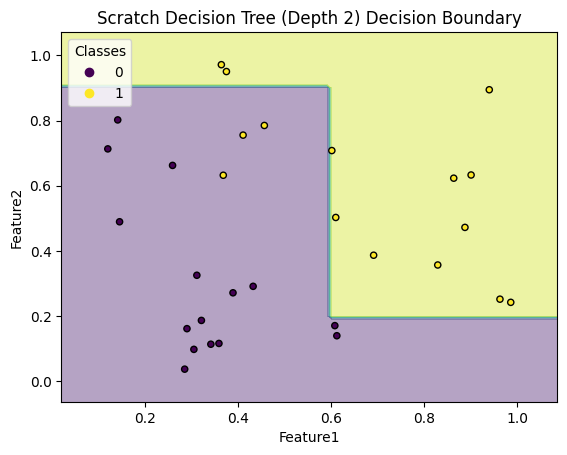

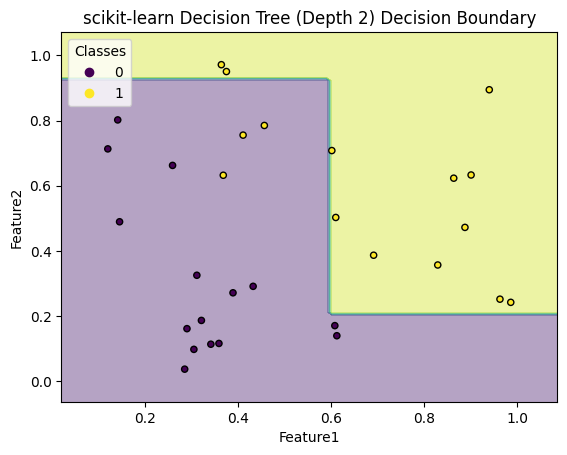

In [8]:
import numpy as np
import pandas as pd
from collections import Counter

def gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    probabilities = class_counts / total_samples
    gini = 1 - np.sum(probabilities**2)
    return gini

def information_gain(parent_counts, left_counts, right_counts):
    parent_impurity = gini_impurity(parent_counts)
    left_impurity = gini_impurity(left_counts)
    right_impurity = gini_impurity(right_counts)

    parent_total = np.sum(parent_counts)
    left_total = np.sum(left_counts)
    right_total = np.sum(right_counts)

    if parent_total == 0:
        return 0.0

    weighted_impurity = (left_total / parent_total) * left_impurity + \
                        (right_total / parent_total) * right_impurity

    information_gain_value = parent_impurity - weighted_impurity
    return information_gain_value

def create_split(data, feature_index, threshold):
    left_data = data[data[:, feature_index] <= threshold]
    right_data = data[data[:, feature_index] > threshold]
    return left_data, right_data

def calculate_class_counts(data, target_index):
    classes, counts = np.unique(data[:, target_index], return_counts=True)
    class_counts = {cls: count for cls, count in zip(classes, counts)}
    return class_counts

def get_leaf_label(counts):
    if not counts:
        return None
    classes = list(counts.keys())
    if len(classes) == 1:
        return classes[0]
    else:
        return max(counts, key=counts.get)

class Node:
    """Represents a node in the decision tree."""
    def __init__(self, feature_index=None, threshold=None, left_child=None, right_child=None, label=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child
        self.label = label

class ScratchDecisionTreeClassifierDepth2:
    """A decision tree classifier with a maximum depth of 2."""
    def __init__(self):
        self.root = None
        self.feature_names = None
        self.target_name = None
        self.target_index = None

    def _find_best_split(self, data, target_index):
        """Finds the best split for a given node."""
        best_gain = 0
        best_split_feature_index = None
        best_split_threshold = None
        parent_counts = np.array(list(calculate_class_counts(data, target_index).values()))
        n_samples, n_features = data.shape[0], data.shape[1] - 1

        if n_samples <= 1 or len(np.unique(data[:, target_index])) == 1:
            return None, None, 0

        for feature_index in range(n_features):
            unique_values = np.unique(data[:, feature_index])
            for threshold in unique_values:
                left_data, right_data = create_split(data, feature_index, threshold)
                if len(left_data) > 0 and len(right_data) > 0:
                    left_counts = np.array(list(calculate_class_counts(left_data, target_index).values()))
                    right_counts = np.array(list(calculate_class_counts(right_data, target_index).values()))
                    gain = information_gain(parent_counts, left_counts, right_counts)
                    if gain > best_gain:
                        best_gain = gain
                        best_split_feature_index = feature_index
                        best_split_threshold = threshold
        return best_split_feature_index, best_split_threshold, best_gain

    def _build_tree(self, data, target_index, depth):
        """Recursively builds the decision tree up to the specified depth."""
        if depth >= 2 or len(np.unique(data[:, target_index])) == 1:
            class_counts = calculate_class_counts(data, target_index)
            return Node(label=get_leaf_label(class_counts))

        best_feature_index, best_threshold, best_gain = self._find_best_split(data, target_index)

        if best_gain > 0:
            left_data, right_data = create_split(data, best_feature_index, best_threshold)
            left_child = self._build_tree(left_data, target_index, depth + 1)
            right_child = self._build_tree(right_data, target_index, depth + 1)
            return Node(feature_index=best_feature_index, threshold=best_threshold,
                        left_child=left_child, right_child=right_child)
        else:
            class_counts = calculate_class_counts(data, target_index)
            return Node(label=get_leaf_label(class_counts))

    def fit(self, X, y):
        """Fits the decision tree to the training data up to depth 2."""
        data = pd.concat([pd.DataFrame(X, columns=self.feature_names), pd.Series(y, name=self.target_name)], axis=1).values
        self.target_index = X.shape[1]  # Target is the last column
        self.root = self._build_tree(data, self.target_index, 0)
        print("\nScratch Decision Tree (Depth 2) trained.")

    def predict_single(self, sample, node):
        """Predicts the class for a single sample using the trained tree."""
        if node.label is not None:
            return node.label
        if sample[node.feature_index] <= node.threshold:
            return self.predict_single(sample, node.left_child)
        else:
            return self.predict_single(sample, node.right_child)

    def predict(self, X):
        """Predicts the class labels for the given data."""
        return np.array([self.predict_single(sample, self.root) for sample in X])

# Example Usage:
# Sample training data (replace with your actual data)
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where((X[:, 0] + X[:, 1]) > 1, 1, 0)

# Feature and target names
feature_names = ['Feature1', 'Feature2']
target_name = 'Target'

# Train the Depth 2 Decision Tree
model_depth2 = ScratchDecisionTreeClassifierDepth2()
model_depth2.feature_names = feature_names
model_depth2.target_name = target_name
model_depth2.fit(X, y)

# Make predictions
X_test = np.array([[0.6, 0.6], [0.2, 0.8], [0.9, 0.3], [0.7, 0.9]])
predictions_depth2 = model_depth2.predict(X_test)
print("\nPredictions for X_test (Depth 2):", predictions_depth2)

# You can further evaluate against scikit-learn's DecisionTreeClassifier(max_depth=2)
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

X_train, X_test_skl, y_train, y_test_skl = train_test_split(X, y, test_size=0.3, random_state=42)

sklearn_model_depth2 = SklearnDecisionTreeClassifier(max_depth=2, criterion='gini')
sklearn_model_depth2.fit(X_train, y_train)
sklearn_predictions_depth2 = sklearn_model_depth2.predict(X_test_skl)

print("\n--- scikit-learn Decision Tree (Depth 2) Evaluation ---")
print("Accuracy:", accuracy_score(y_test_skl, sklearn_predictions_depth2))
print("Precision:", precision_score(y_test_skl, sklearn_predictions_depth2))
print("Recall:", recall_score(y_test_skl, sklearn_predictions_depth2))

# Evaluate your scratch model on the same test set for comparison
X_test_scratch = X_test_skl
y_test_scratch = y_test_skl
scratch_predictions_depth2_eval = model_depth2.predict(X_test_scratch)

print("\n--- Scratch Decision Tree (Depth 2) Evaluation ---")
print("Accuracy:", accuracy_score(y_test_scratch, scratch_predictions_depth2_eval))
print("Precision:", precision_score(y_test_scratch, scratch_predictions_depth2_eval))
print("Recall:", recall_score(y_test_scratch, scratch_predictions_depth2_eval))

# Visualization (Conceptual - harder for depth 2 without plotting the tree structure)
# Visualizing the decision boundary can still be done, but the boundary will likely be more complex.
def plot_decision_boundary_depth2(model, X, y, title, feature_names):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary_depth2(model_depth2, X_test_skl, y_test_skl, 'Scratch Decision Tree (Depth 2) Decision Boundary', feature_names)
plot_decision_boundary_depth2(sklearn_model_depth2, X_test_skl, y_test_skl, 'scikit-learn Decision Tree (Depth 2) Decision Boundary', feature_names)

##### 【Problem 8 】 (Advance Challenge) Determination of tree classifier class with unlimited depth

In [9]:
import numpy as np
import pandas as pd
from collections import Counter

def gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    probabilities = class_counts / total_samples
    gini = 1 - np.sum(probabilities**2)
    return gini

def information_gain(parent_counts, left_counts, right_counts):
    parent_impurity = gini_impurity(parent_counts)
    left_impurity = gini_impurity(left_counts)
    right_impurity = gini_impurity(right_counts)

    parent_total = np.sum(parent_counts)
    left_total = np.sum(left_counts)
    right_total = np.sum(right_counts)

    if parent_total == 0:
        return 0.0

    weighted_impurity = (left_total / parent_total) * left_impurity + \
                        (right_total / parent_total) * right_impurity

    information_gain_value = parent_impurity - weighted_impurity
    return information_gain_value

def create_split(data, feature_index, threshold):
    left_data = data[data[:, feature_index] <= threshold]
    right_data = data[data[:, feature_index] > threshold]
    return left_data, right_data

def calculate_class_counts(data, target_index):
    classes, counts = np.unique(data[:, target_index], return_counts=True)
    class_counts = {cls: count for cls, count in zip(classes, counts)}
    return class_counts

def get_leaf_label(counts):
    if not counts:
        return None
    classes = list(counts.keys())
    if len(classes) == 1:
        return classes[0]
    else:
        return max(counts, key=counts.get)

class Node:
    """Represents a node in the decision tree."""
    def __init__(self, feature_index=None, threshold=None, left_child=None, right_child=None, label=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child
        self.label = label

class ScratchDecisionTreeClassifierDepthInf:
    """A decision tree classifier with unlimited depth or a specified depth."""
    def __init__(self, max_depth=None):
        self.root = None
        self.feature_names = None
        self.target_name = None
        self.target_index = None
        self.max_depth = max_depth

    def _find_best_split(self, data, target_index):
        """Finds the best split for a given node."""
        best_gain = 0
        best_split_feature_index = None
        best_split_threshold = None
        parent_counts = np.array(list(calculate_class_counts(data, target_index).values()))
        n_samples, n_features = data.shape[0], data.shape[1] - 1

        if n_samples <= 1 or len(np.unique(data[:, target_index])) == 1:
            return None, None, 0

        for feature_index in range(n_features):
            unique_values = np.unique(data[:, feature_index])
            for threshold in unique_values:
                left_data, right_data = create_split(data, feature_index, threshold)
                if len(left_data) > 0 and len(right_data) > 0:
                    left_counts = np.array(list(calculate_class_counts(left_data, target_index).values()))
                    right_counts = np.array(list(calculate_class_counts(right_data, target_index).values()))
                    gain = information_gain(parent_counts, left_counts, right_counts)
                    if gain > best_gain:
                        best_gain = gain
                        best_split_feature_index = feature_index
                        best_split_threshold = threshold
        return best_split_feature_index, best_split_threshold, best_gain

    def _build_tree(self, data, target_index, depth):
        """Recursively builds the decision tree."""
        current_gini = gini_impurity(np.array(list(calculate_class_counts(data, target_index).values())))

        if current_gini == 0 or (self.max_depth is not None and depth >= self.max_depth) or len(data) <= 1:
            return Node(label=get_leaf_label(calculate_class_counts(data, target_index)))

        best_feature_index, best_threshold, best_gain = self._find_best_split(data, target_index)

        if best_gain > 0:
            left_data, right_data = create_split(data, best_feature_index, best_threshold)
            left_child = self._build_tree(left_data, target_index, depth + 1)
            right_child = self._build_tree(right_data, target_index, depth + 1)
            return Node(feature_index=best_feature_index, threshold=best_threshold,
                        left_child=left_child, right_child=right_child)
        else:
            # No good split found, create a leaf node
            return Node(label=get_leaf_label(calculate_class_counts(data, target_index)))

    def fit(self, X, y):
        """Fits the decision tree to the training data."""
        data = pd.concat([pd.DataFrame(X, columns=self.feature_names), pd.Series(y, name=self.target_name)], axis=1).values
        self.target_index = X.shape[1]  # Target is the last column
        self.root = self._build_tree(data, self.target_index, 0)
        print("\nScratch Decision Tree trained.")
        if self.max_depth is not None:
            print(f"Maximum depth: {self.max_depth}")
        else:
            print("Maximum depth: Unlimited (until pure leaves)")

    def predict_single(self, sample, node):
        """Predicts the class for a single sample using the trained tree."""
        if node.label is not None:
            return node.label
        if sample[node.feature_index] <= node.threshold:
            return self.predict_single(sample, node.left_child)
        else:
            return self.predict_single(sample, node.right_child)

    def predict(self, X):
        """Predicts the class labels for the given data."""
        return np.array([self.predict_single(sample, self.root) for sample in X])

# Example Usage:
# Sample training data (replace with your actual data)
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where((X[:, 0] + X[:, 1]) > 1, 1, 0)

# Feature and target names
feature_names = ['Feature1', 'Feature2']
target_name = 'Target'

# Train a Decision Tree with unlimited depth
model_inf_depth = ScratchDecisionTreeClassifierDepthInf()
model_inf_depth.feature_names = feature_names
model_inf_depth.target_name = target_name
model_inf_depth.fit(X, y)

# Make predictions
X_test = np.array([[0.6, 0.6], [0.2, 0.8], [0.9, 0.3], [0.7, 0.9]])
predictions_inf_depth = model_inf_depth.predict(X_test)
print("\nPredictions for X_test (Unlimited Depth):", predictions_inf_depth)

# Train a Decision Tree with a specified depth (e.g., depth 3)
model_specified_depth = ScratchDecisionTreeClassifierDepthInf(max_depth=3)
model_specified_depth.feature_names = feature_names
model_specified_depth.target_name = target_name
model_specified_depth.fit(X, y)
predictions_specified_depth = model_specified_depth.predict(X_test)
print("\nPredictions for X_test (Specified Depth 3):", predictions_specified_depth)

# Comparison with scikit-learn (for reference)
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

X_train, X_test_skl, y_train, y_test_skl = train_test_split(X, y, test_size=0.3, random_state=42)

sklearn_model_inf = SklearnDecisionTreeClassifier(criterion='gini') # Unlimited depth by default
sklearn_model_inf.fit(X_train, y_train)
sklearn_predictions_inf = sklearn_model_inf.predict(X_test_skl)

print("\n--- scikit-learn Decision Tree (Unlimited Depth) Evaluation ---")
print("Accuracy:", accuracy_score(y_test_skl, sklearn_predictions_inf))
print("Precision:", precision_score(y_test_skl, sklearn_predictions_inf))
print("Recall:", recall_score(y_test_skl, sklearn_predictions_inf))

sklearn_model_depth3 = SklearnDecisionTreeClassifier(max_depth=3, criterion='gini')
sklearn_model_depth3.fit(X_train, y_train)
sklearn_predictions_depth3 = sklearn_model_depth3.predict(X_test_skl)

print("\n--- scikit-learn Decision Tree (Depth 3) Evaluation ---")
print("Accuracy:", accuracy_score(y_test_skl, sklearn_predictions_depth3))
print("Precision:", precision_score(y_test_skl, sklearn_predictions_depth3))
print("Recall:", recall_score(y_test_skl, sklearn_predictions_depth3))

# You can also visualize the decision boundaries, but they will likely be more complex for deeper trees.


Scratch Decision Tree trained.
Maximum depth: Unlimited (until pure leaves)

Predictions for X_test (Unlimited Depth): [1. 0. 1. 1.]

Scratch Decision Tree trained.
Maximum depth: 3

Predictions for X_test (Specified Depth 3): [1. 0. 1. 1.]

--- scikit-learn Decision Tree (Unlimited Depth) Evaluation ---
Accuracy: 0.9
Precision: 1.0
Recall: 0.8

--- scikit-learn Decision Tree (Depth 3) Evaluation ---
Accuracy: 0.9
Precision: 1.0
Recall: 0.8
